# Intro to NLP for AI | 06 - Topic Modeling

Topic Modeling is a type of statistical modeling used to uncover the abstract topics that occur in a collection of documents. It is a form of unsupervised learning, which means it does not require labeled data. Instead, it relies on the co-occurrence patterns of words within the documents to discover latent topics.

Topic Modeling reduces the complexity of text data by representing documents in terms of a limited number of topics. It enhances the retrieval of relevant information by identifying underlying themes. Moreover, it provides a way to explore and understand large collections of text data by summarizing them into interpretable topics.

## Latent Dirichlet Allocation (LDA)

Latent Dirichlet Allocation (LDA) is a generative probabilistic model designed to discover latent topics in large collections of text documents. LDA assumes that each document is a mixture of topics and that each topic is a mixture of words. The goal of LDA is to identify these topics and determine the distribution of topics within each document and the distribution of words within each topic.

LDA operates on the following principles:

* **Document-Topic Distribution:** Each document is represented as a distribution over topics, meaning that a document can belong to multiple topics, each with a certain probability.
* **Topic-Word Distribution:** Each topic is represented as a distribution over words. This implies that a topic is defined by a set of words, each associated with a probability of appearing in that topic.
* **Generative Process:** LDA uses a generative process to create documents This involves choosing a distribution of topics for each document; for each word in the document, selecting a topic based on the topic distribution; generating the word from the selected topic's word distribution.

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import gensim
import gensim.corpora as corpora

In [2]:
data = pd.read_csv('news_articles.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       100 non-null    int64 
 1   title    100 non-null    object
 2   content  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [4]:
data.head(10)

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...
5,23141,Ted Cruz Names Carly Fiorina as His Running Ma...,"INDIANAPOLIS — Senator Ted Cruz of Texas, d..."
6,17295,"Mar-a-Lago, the Future Winter White House and ...","WEST PALM BEACH, Fla. — When Donald J. Tr..."
7,22749,Taylor Swift Releases a Surprise Single With Z...,This year could not end without a little bit o...
8,20453,"Why Donald Trump, Not Paul Ryan, Is Setting th...",WASHINGTON — Speaker Paul D. Ryan delivered...
9,25918,Spokesman’s Death Will Have Islamic State Turn...,WASHINGTON — The reported death of the Isla...


In [8]:
articles = data['content']

In [9]:
# TEXT PREPROCESSING
articles = articles.str.lower().apply(lambda x: re.sub(r"[^\w\s]", "", x))

en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in en_stopwords]))

articles = articles.apply(lambda x: word_tokenize(x))

ps = PorterStemmer()
articles = articles.apply(lambda tokens: [ps.stem(token) for token in tokens])

In [10]:
articles

0     [dr, frank, sack, professor, nutrit, harvard, ...
1     [south, carolina, win, duke, surpris, fan, pos...
2     [want, get, brief, email, here, good, even, he...
3     [banjul, gambia, week, inaugur, anoth, countri...
4     [biggest, book, summer, isnt, blockbust, thril...
                            ...                        
95    [want, get, brief, email, here, good, even, he...
96    [tallinn, estonia, guard, brought, ahm, abdul,...
97    [gov, scott, walker, wisconsin, activ, wiscons...
98    [social, media, shook, emot, headlin, shout, n...
99    [moment, joanna, acevedo, first, set, foot, bo...
Name: content, Length: 100, dtype: object

In [25]:
print(articles[1])

['south', 'carolina', 'win', 'duke', 'surpris', 'fan', 'postgam', 'revelri', 'coach', 'frank', 'martin', 'ask', 'assist', 'team', 'would', 'face', 'next', 'got', 'martin', 'said', 'answer', 'gamecock', 'would', 'face', 'baylor', 'new', 'york', 'madison', 'squar', 'garden', 'tide', 'emot', 'swept', 'coach', 'martin', 'know', 'deep', 'root', 'south', 'carolina', 'program', 'pipelin', 'former', 'coach', 'frank', 'mcguir', 'establish', 'borough', 'buse', 'citi', 'flair', 'southern', 'countrysid', 'first', 'bobbi', 'cremin', 'kevin', 'joyc', 'mike', 'dunleavi', 'brian', 'winter', 'last', 'three', 'team', '1973', 'last', 'one', 'south', 'carolina', 'win', 'n', 'c', 'tournament', 'one', 'team', 'follow', 'upset', 'duke', 'complet', 'thrash', 'baylor', 'goe', 'zoom', 'round', '8', 'face', 'florida', 'propel', 'victori', 'mcguir', 'die', '1994', 'would', 'unquestion', 'ador', 'start', 'mindset', 'martin', 'said', 'got', 'guy', 'complet', 'bought', 'baylor', 'team', 'whose', 'individu', 'talent'

In [13]:
dictionary = corpora.Dictionary(articles)

In [14]:
print(dictionary)

Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


In [19]:
dictionary[50]

'allow'

In [20]:
doc_term = [dictionary.doc2bow(text) for text in articles]

In [23]:
print(doc_term[1])

[(9, 2), (23, 1), (35, 1), (62, 2), (76, 2), (86, 1), (87, 1), (90, 1), (93, 1), (110, 2), (120, 1), (122, 2), (133, 1), (169, 1), (174, 1), (185, 1), (204, 1), (209, 1), (217, 1), (245, 1), (247, 1), (249, 1), (250, 1), (252, 3), (257, 1), (261, 1), (263, 2), (271, 2), (275, 1), (291, 2), (292, 4), (295, 1), (298, 1), (322, 1), (325, 1), (345, 1), (346, 1), (351, 3), (354, 1), (363, 1), (369, 2), (385, 1), (387, 1), (398, 1), (405, 5), (422, 1), (440, 3), (485, 1), (492, 1), (535, 7), (539, 1), (544, 1), (546, 2), (575, 1), (585, 1), (594, 1), (614, 1), (628, 1), (631, 2), (644, 1), (646, 1), (664, 1), (670, 1), (674, 1), (677, 2), (680, 1), (681, 3), (688, 1), (693, 1), (694, 2), (695, 1), (696, 1), (697, 1), (698, 1), (699, 1), (700, 1), (701, 1), (702, 1), (703, 1), (704, 1), (705, 1), (706, 1), (707, 1), (708, 1), (709, 1), (710, 10), (711, 5), (712, 1), (713, 1), (714, 1), (715, 1), (716, 1), (717, 1), (718, 1), (719, 1), (720, 1), (721, 7), (722, 1), (723, 1), (724, 5), (725, 2)

In [30]:
num_topics = 5
lda_model = gensim.models.LdaModel(corpus=doc_term, id2word=dictionary, num_topics=num_topics)

In [31]:
lda_model.print_topics(num_topics=5, num_words=10)

[(0,
  '0.020*"mr" + 0.018*"said" + 0.006*"state" + 0.005*"would" + 0.005*"trump" + 0.004*"new" + 0.004*"year" + 0.004*"one" + 0.004*"like" + 0.003*"time"'),
 (1,
  '0.022*"mr" + 0.017*"said" + 0.007*"trump" + 0.005*"one" + 0.004*"would" + 0.004*"year" + 0.004*"peopl" + 0.003*"state" + 0.003*"new" + 0.003*"two"'),
 (2,
  '0.013*"mr" + 0.010*"said" + 0.005*"year" + 0.005*"peopl" + 0.004*"like" + 0.004*"would" + 0.004*"one" + 0.004*"new" + 0.003*"trump" + 0.003*"state"'),
 (3,
  '0.010*"mr" + 0.009*"said" + 0.005*"year" + 0.004*"state" + 0.004*"one" + 0.004*"trump" + 0.004*"peopl" + 0.003*"ms" + 0.003*"like" + 0.003*"would"'),
 (4,
  '0.015*"mr" + 0.015*"said" + 0.008*"trump" + 0.004*"would" + 0.004*"one" + 0.004*"state" + 0.003*"new" + 0.003*"ms" + 0.003*"peopl" + 0.003*"like"')]

## Latent Semantic Analysis (LSA)

Latent Semantic Analysis (LSA) is a method used to find hidden meanings in text. It looks at how words appear in different documents and discovers patterns in their usage. Instead of just counting how often words show up, LSA tries to understand the context and relationship between words. It works by turning text into a big table of word counts and then using math to shrink that table down keeping only the most imporant parts. This helps computers group similar words and document together based on meaning, not just exact words.

Below are the steps for how LSA works:

1. **Document Term Matrix (DTM)**: This is a table where each row represents a word each column represents a document and each cell shows how many times that word appears in that document. Sometimes instead of raw counts, TF-IDF scores are used to give more importance to rare and meaningful words. This matrix is the foundation for analyzing patterns in word usage across documents.

2. **Dimensionality Reduction:** DTM is usually very large and sparse. To simplify, it applies Singular Value Decomposition (SVD) technique which breaks the matrix into three smaller matrices and only the top k components are kept to capture the most important patterns.

3. **Analyze Semantic Relationships:** After dimensionality reduction, each word and each document is now represented in a smaller semantic space based on the topics identified. Words that appear in similar contexts end up close together in this space even if they are not exactly the same. This helps LSA detect synonyms and understand conceptual similarity between different terms.

4. **Document Comparison:** As the documents are represented in this semantic space, it's easy to compare them using measures like cosine similarity. Documents that talk about similar topics will be close together even if they use different words. This makes LSA useful for tasks like clustering, ranking search results and grouping similar articles even when the vocabulary differs.

In [32]:
from gensim.models import LsiModel

In [33]:
lsa_model = LsiModel(corpus=doc_term, id2word=dictionary, num_topics=num_topics)

In [36]:
lsa_model.print_topics(num_topics=5, num_words=10)

[(0,
  '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would" + 0.108*"year" + 0.102*"one" + 0.091*"like" + 0.090*"peopl" + 0.086*"new"'),
 (1,
  '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight" + 0.140*"taliban" + 0.120*"one" + 0.120*"dr" + 0.120*"peopl" + 0.107*"year"'),
 (2,
  '0.460*"saudi" + 0.264*"taliban" + -0.249*"weight" + 0.194*"afghanistan" + -0.191*"dr" + 0.189*"arabia" + 0.174*"afghan" + 0.139*"offici" + -0.139*"diet" + 0.127*"state"'),
 (3,
  '-0.405*"weight" + -0.279*"dr" + -0.229*"mr" + -0.227*"diet" + -0.212*"saudi" + -0.184*"pound" + -0.172*"obes" + -0.139*"drug" + 0.139*"said" + 0.131*"ms"'),
 (4,
  '0.271*"state" + -0.237*"trump" + -0.192*"show" + 0.187*"said" + -0.153*"saudi" + -0.150*"play" + 0.125*"exxon" + 0.124*"islam" + -0.120*"asian" + -0.114*"actor"')]

## Find the optimum topic number

It is highly recommended to use `CoherenceModel` from `gensim` library to observe the best topic number for the given model, topics, and dictionary.

Objects of this class allow for building and maintaining a model for topic coherence. The main methods are:

* constructor, which initializes the four-stage pipeline by accepting a coherence measure.
* `get_coherence()` method, which returns the topic coherence.

One way of using this feature is through providing a trained topic model. A dictionary has to be explicitly provided if the model does not contain a dictionary already.

Another way of using this feature is through providing tokenized topics. (e.g. `[['human', 'computer', 'system', 'interface'], ['graph', 'minors', 'trees', 'eps']]`)

In [38]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [41]:
coherence_values = []
model_list = []
min_topics = 2
max_topics = 11

In [43]:
for num_topics_i in range(min_topics, max_topics+1):
    model = LsiModel(doc_term, num_topics=num_topics_i, id2word=dictionary, random_seed=0)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=articles, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

In [44]:
coherence_values

[np.float64(0.37325067097153986),
 np.float64(0.39910962869158273),
 np.float64(0.3417196044330558),
 np.float64(0.3931755402080907),
 np.float64(0.3190091658670059),
 np.float64(0.3976169817296697),
 np.float64(0.3539249983694658),
 np.float64(0.3202961600385085),
 np.float64(0.38211972780104314),
 np.float64(0.40921213836092424)]

In [45]:
model_list

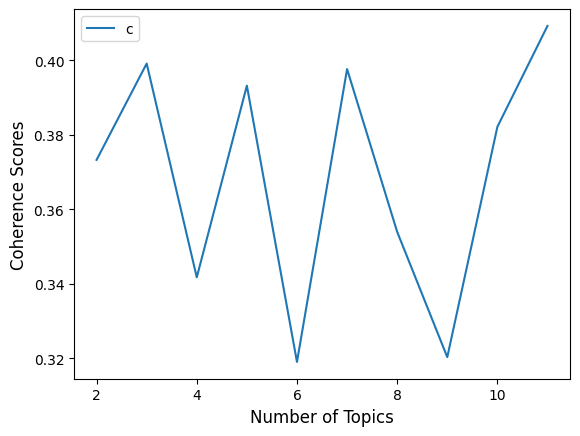

In [51]:
plt.plot(range(min_topics, max_topics+1), coherence_values)
plt.xlabel("Number of Topics", fontsize=12)
plt.ylabel("Coherence Scores", fontsize=12)
plt.legend(("coherence_values"), loc='best')
plt.show()

In [52]:
final_n_topics = 3
lsa_model_f = LsiModel(doc_term, num_topics=final_n_topics, id2word=dictionary)

In [54]:
print(lsa_model_f.print_topics(num_topics=final_n_topics, num_words=10))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would" + 0.108*"year" + 0.102*"one" + 0.091*"like" + 0.090*"peopl" + 0.086*"new"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight" + 0.140*"taliban" + 0.120*"one" + 0.120*"dr" + 0.120*"peopl" + 0.107*"year"'), (2, '-0.460*"saudi" + -0.264*"taliban" + 0.249*"weight" + -0.194*"afghanistan" + 0.191*"dr" + -0.189*"arabia" + -0.174*"afghan" + -0.139*"offici" + 0.139*"diet" + -0.127*"state"')]
